In [1]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
# Export transformed data as CSV
df = pd.read_csv("../transformed-data/transformed-global-confirmed-cases.csv")
df.head()

,Province/State,Country/Region,Lat,Long,date,numcases
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [16]:
# Bar Chart as of 4/1/2020
df_4_1 = df[df['date'].str.contains('4/1/20')]
df_4_1 = df_4_1[['Country/Region', 'date', 'numcases']]
print('CHECK THAT FILTERING WORK')
print('Number of countries in dataset = {}',df['Country/Region'].nunique())
print('Number of countries in filtered dataset = {}',df_4_1['Country/Region'].nunique())

CHECK THAT FILTERING WORK
Number of countries in dataset = {} 183
Number of countries in filtered dataset = {} 183


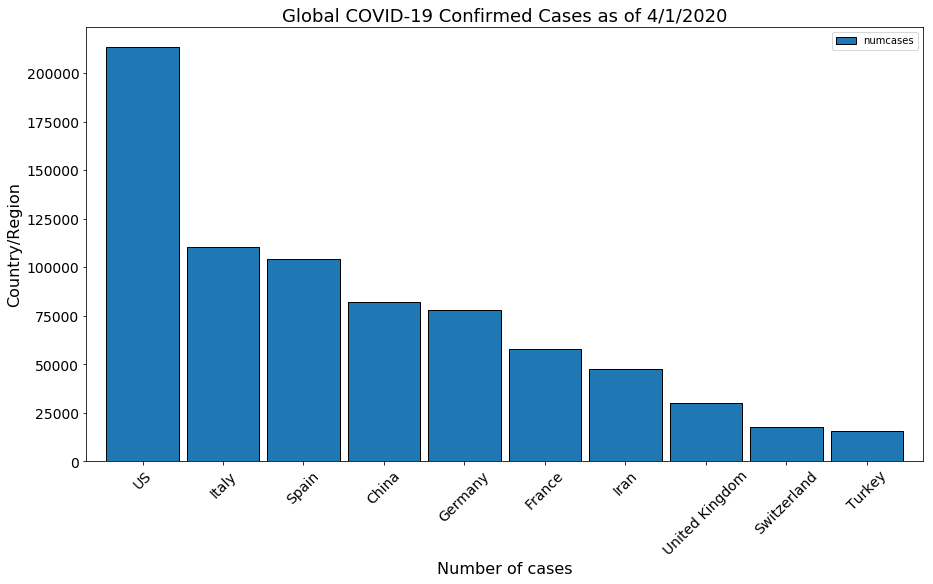

In [79]:
# View only top 10
big_font, mid_font, small_font = 18, 16, 14

global_cases_df1 = df_4_1.groupby('Country/Region').sum()
fig = global_cases_df1.nlargest(10, columns='numcases').sort_values(by='numcases', ascending=False).plot(kind='bar',
                        fontsize = small_font, width=0.9, figsize=(15, 8), edgecolor='k', rot=45)

plt.title('Global COVID-19 Confirmed Cases as of 4/1/2020', fontsize=big_font);
plt.xlabel('Number of cases', fontsize=mid_font);
plt.ylabel('Country/Region', fontsize=mid_font);

### Global Corona Virus Deaths

In [61]:
# Load data as CSV
df2 = pd.read_csv("../transformed-data/transformed-global-covid19-deaths.csv")
df2.head()

,Province/State,Country/Region,Lat,Long,date,numdeaths
0,NaN,Afghanistan,33.0000,65.0000,1/22/20,0
1,NaN,Albania,41.1533,20.1683,1/22/20,0
2,NaN,Algeria,28.0339,1.6596,1/22/20,0
3,NaN,Andorra,42.5063,1.5218,1/22/20,0
4,NaN,Angola,-11.2027,17.8739,1/22/20,0


In [80]:
# Bar Chart as of 4/1/2020
df2_4_1 = df2[df2['date'].str.contains('4/1/20')]
df2_4_1 = df2_4_1[['Country/Region', 'date', 'numdeaths']]
print('CHECK THAT FILTERING WORK')
print('Number of countries in dataset = {}',df2['Country/Region'].nunique())
print('Number of countries in filtered dataset = {}',df2_4_1['Country/Region'].nunique())

CHECK THAT FILTERING WORK
Number of countries in dataset = {} 183
Number of countries in filtered dataset = {} 183


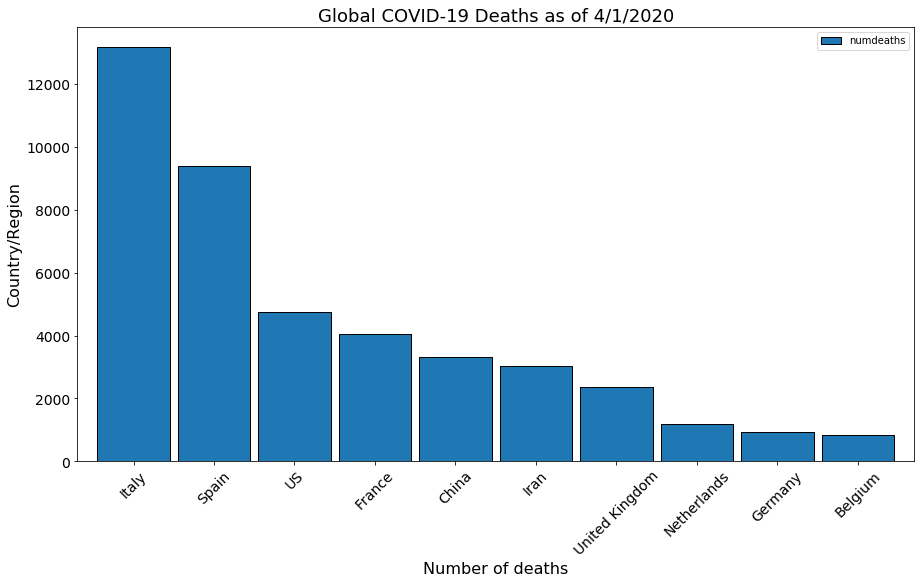

In [81]:
# View Top 10
global_cases_df2 = df2_4_1.groupby('Country/Region').sum()
fig = global_cases_df2.nlargest(10, columns='numdeaths').sort_values(by='numdeaths', ascending=False).plot(kind='bar',
                        fontsize = small_font, width=0.9, figsize=(15, 8), edgecolor='k', rot=45)

plt.title('Global COVID-19 Deaths as of 4/1/2020', fontsize=big_font);
plt.xlabel('Number of deaths', fontsize=mid_font);
plt.ylabel('Country/Region', fontsize=mid_font);

## Compare Progression

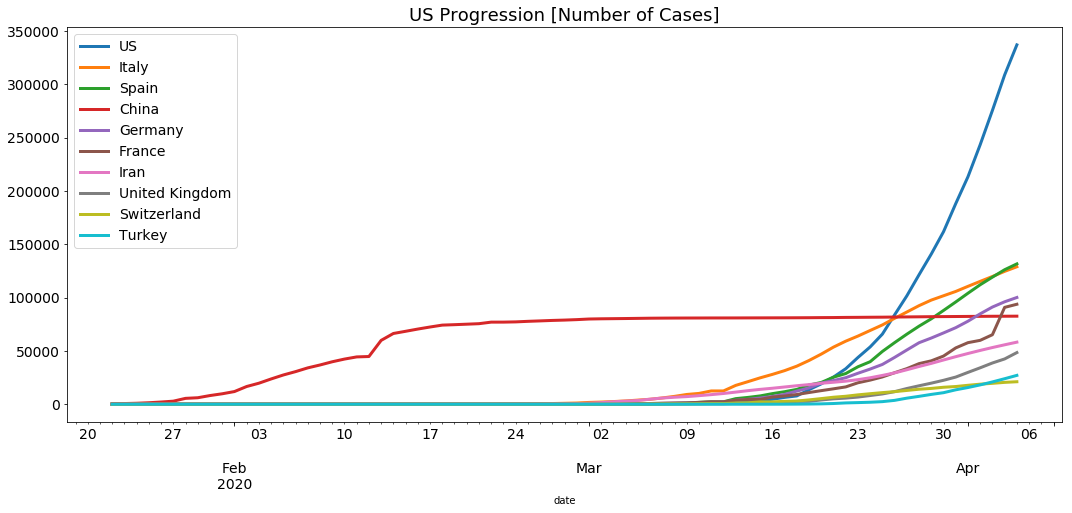

In [99]:
# df['date'] = pd.to_datetime(df.date)

# Compare top 10 countries projection
top_10 = global_cases_df1.nlargest(10, columns='numcases').sort_values(by='numcases', ascending=False).index

for country in top_10: 
    df[df['Country/Region']==country].groupby('date').sum().numcases.plot(figsize=(15,7), linewidth=3, fontsize=14, label=country)
plt.tight_layout()
plt.title("US Progression [Number of Cases]", fontsize=18);
plt.legend(fontsize=14);

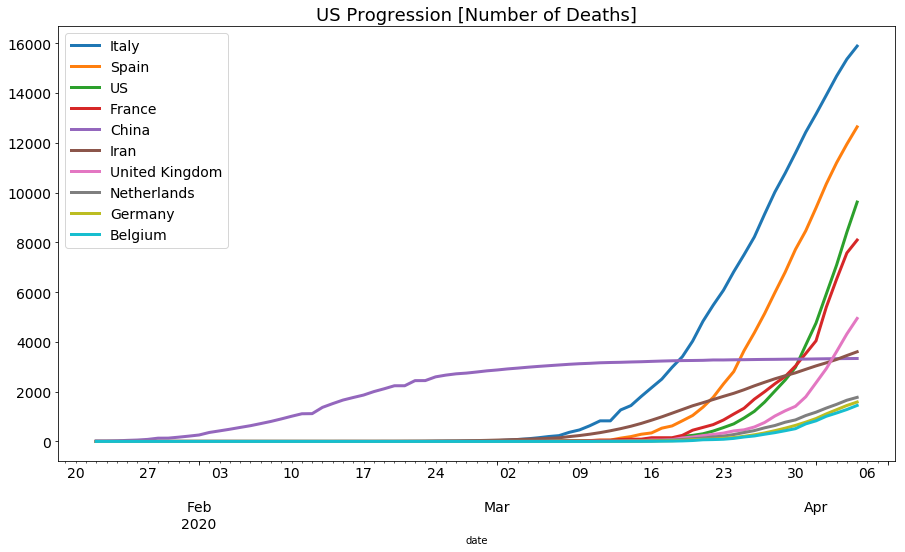

In [87]:
# Compare top 10 countries projection
#df2['date'] = pd.to_datetime(df2.date)

top_10 = global_cases_df2.nlargest(10, columns='numdeaths').sort_values(by='numdeaths', ascending=False).index

for country in top_10: 
    df2[df2['Country/Region']==country].groupby('date').sum().numdeaths.plot(figsize=(15,8), linewidth=3, fontsize=14, label=country)

plt.title("US Progression [Number of Deaths]", fontsize=18);
plt.legend(fontsize=14);

## Recovery Rates 

In [96]:
# Extract data from time series
df_in = pd.read_csv("../csse_covid_19_time_series/time_series_covid19_recovered_global.csv")
df3 = pd.melt(df_in, id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='date', value_name='numcases')
df3 = df_melt.fillna(0)
df3.date = pd.to_datetime(df3.date)
df3.head(5)



,Province/State,Country/Region,Lat,Long,date,numcases
0,,Afghanistan,33.0000,65.0000,2020-01-22,0
1,,Albania,41.1533,20.1683,2020-01-22,0
2,,Algeria,28.0339,1.6596,2020-01-22,0
3,,Andorra,42.5063,1.5218,2020-01-22,0
4,,Angola,-11.2027,17.8739,2020-01-22,0


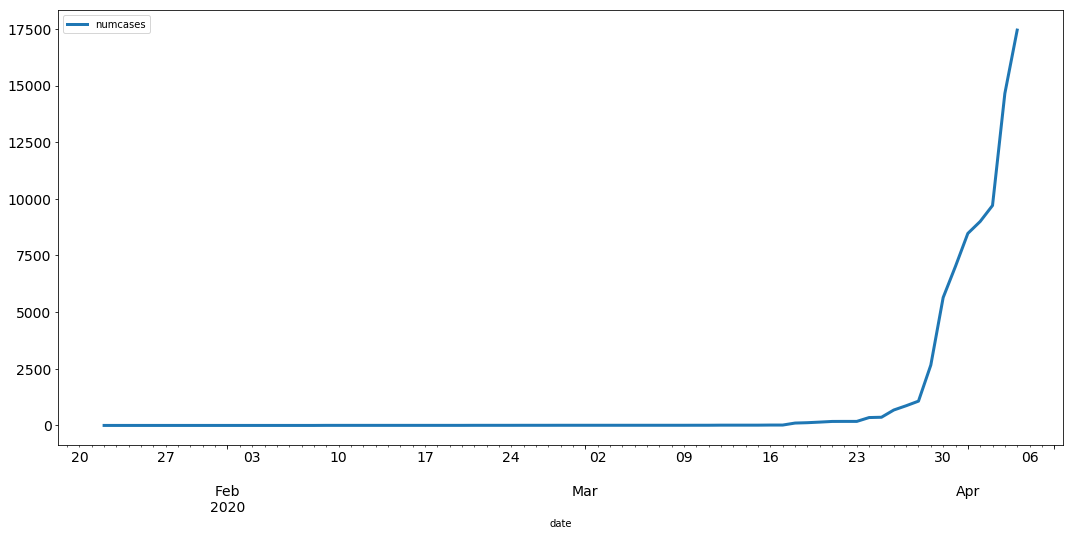

In [101]:
df3[df3['Country/Region']=="US"].plot(x='date', y='numcases', 
                    figsize=(18, 8), linewidth=3, fontsize=14);